# Задание 1

In [2]:
import pandas as pd

df = pd.read_csv('kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2 Изучите стоимости недвижимости

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

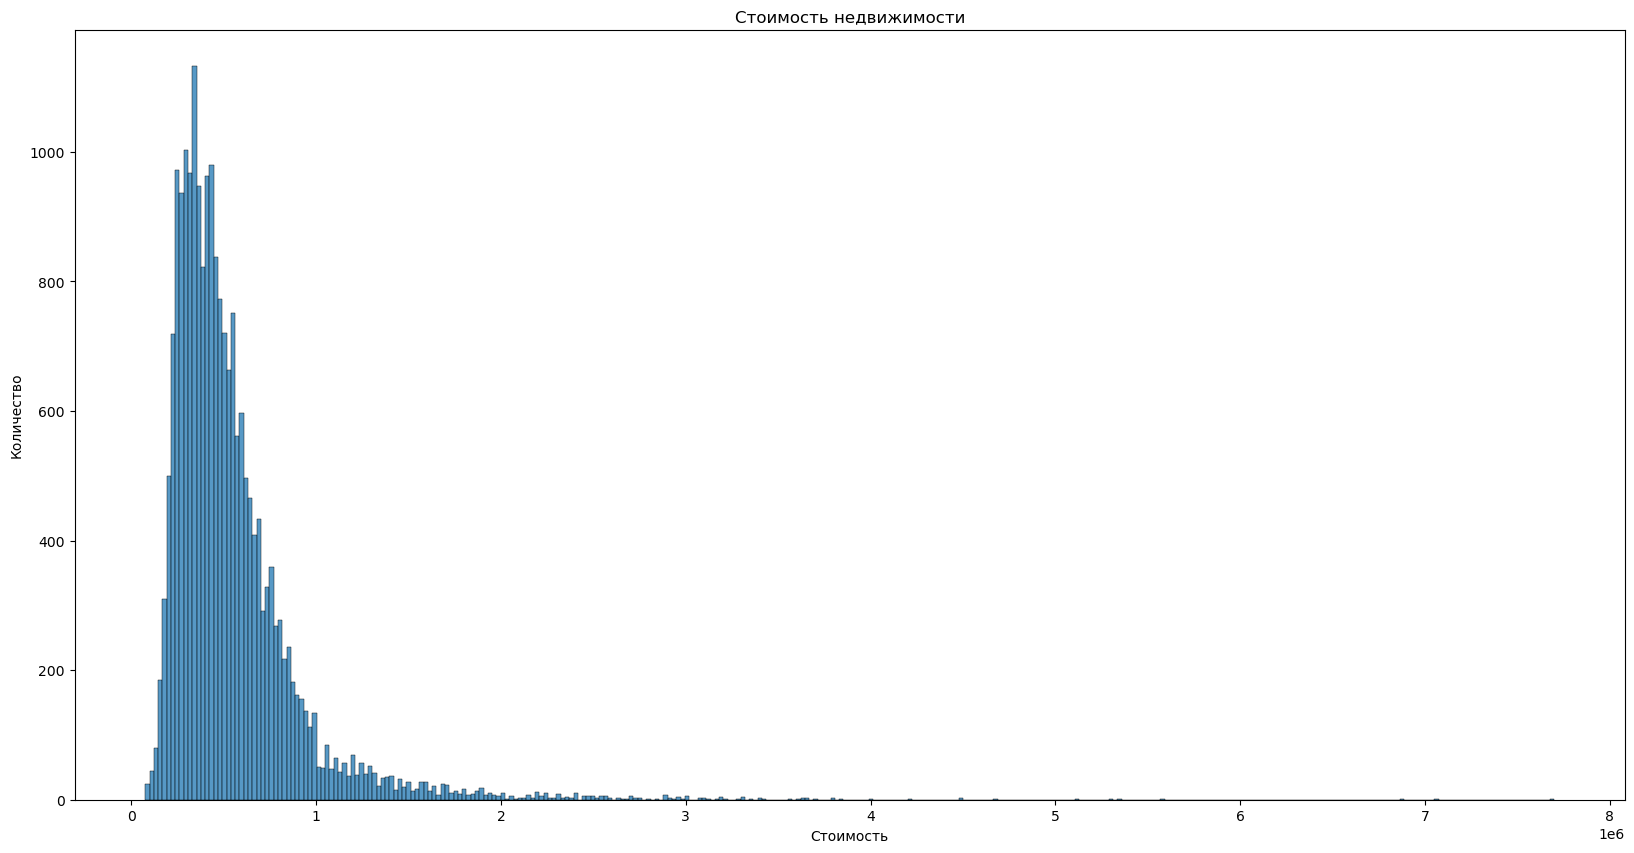

In [33]:
plt.figure(figsize=(20, 10))
sns.histplot(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Вывод: больше домов с ценой от 400000 - 500000.

## 1.3 Изучите распределение квадратуры жилой

Text(0, 0.5, 'Количество')

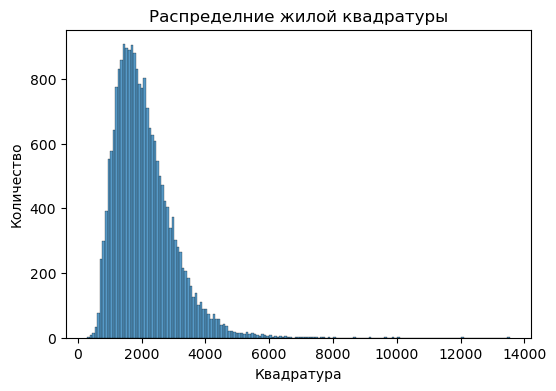

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sqft_living'])
plt.title('Распределние жилой квадратуры')
plt.xlabel('Квадратура')
plt.ylabel('Количество')

Вывод: больше домов с жилой квадратурурой от 1800 - 2100

## 1.4 Изучите распределение года постройки

Text(0, 0.5, 'Количество')

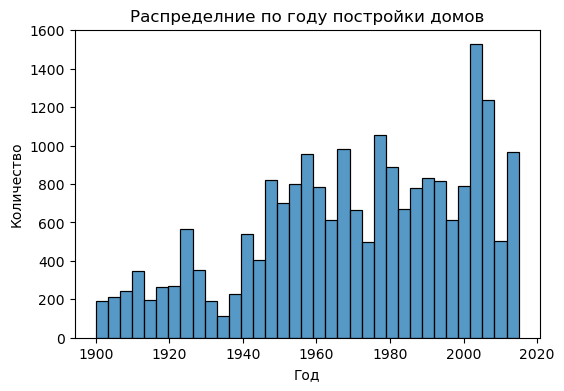

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(df['yr_built'])
plt.title('Распределние по году постройки домов')
plt.xlabel('Год')
plt.ylabel('Количество')

Вывод: больше всего домов было построенно в 2003 - 2004 годах

# Задание 2

## 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график

Сделайте выводы

In [7]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

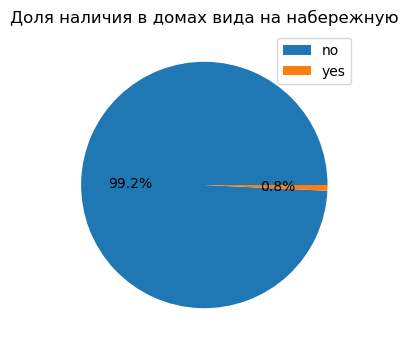

In [8]:
plt.figure(figsize = (6,4))
plt.pie(data, autopct = '%1.1f%%')
plt.title('Доля наличия в домах вида на набережную')
plt.legend(data.index);

Вывод: из всего колчесва предложенных домов, в видом на набережную всего 0,8%

## 2.2 Изучите распределение этажей домов

In [42]:
data = df.groupby('floors').size() / len(df) *100
data.head()

floors
1.0    49.414704
1.5     8.837274
2.0    38.129829
2.5     0.744922
3.0     2.836256
dtype: float64

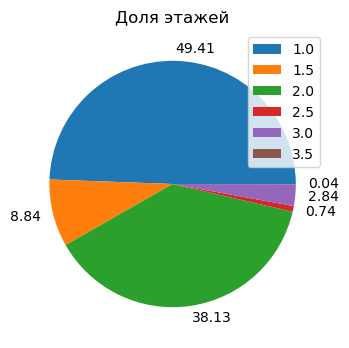

In [43]:
plt.figure(figsize = (6,4))
plt.pie(data,labels = (round((data),2)))
plt.title('Доля этажей')
plt.legend(data.index);

Вывод: диаграмма показывает долю этажности домов от общего количество. Т.е. больше всего одноэтажных домов.

## 2.2 Изучите распределение состояния домов

In [44]:
data = df['condition'].value_counts()
data.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

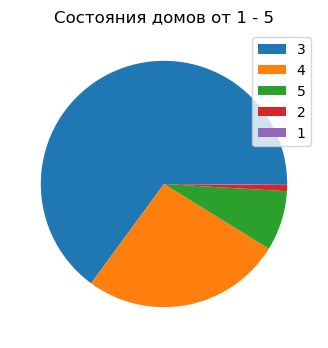

In [45]:
plt.figure(figsize = (6,4))
plt.pie(data)
plt.title('Cостояния домов от 1 - 5')
plt.legend(data.index);

Вывод: больше всего домов со средним состоянием.

# Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### Распределение признаков

Text(0, 0.5, 'Количество')

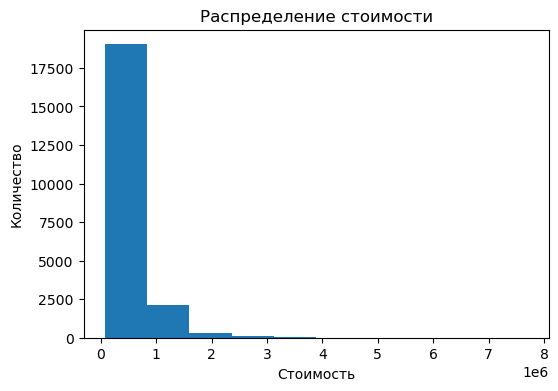

In [4]:
plt.figure(figsize = (6,4))
plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

По графику видим, что больше всего домов со средней стоимостью

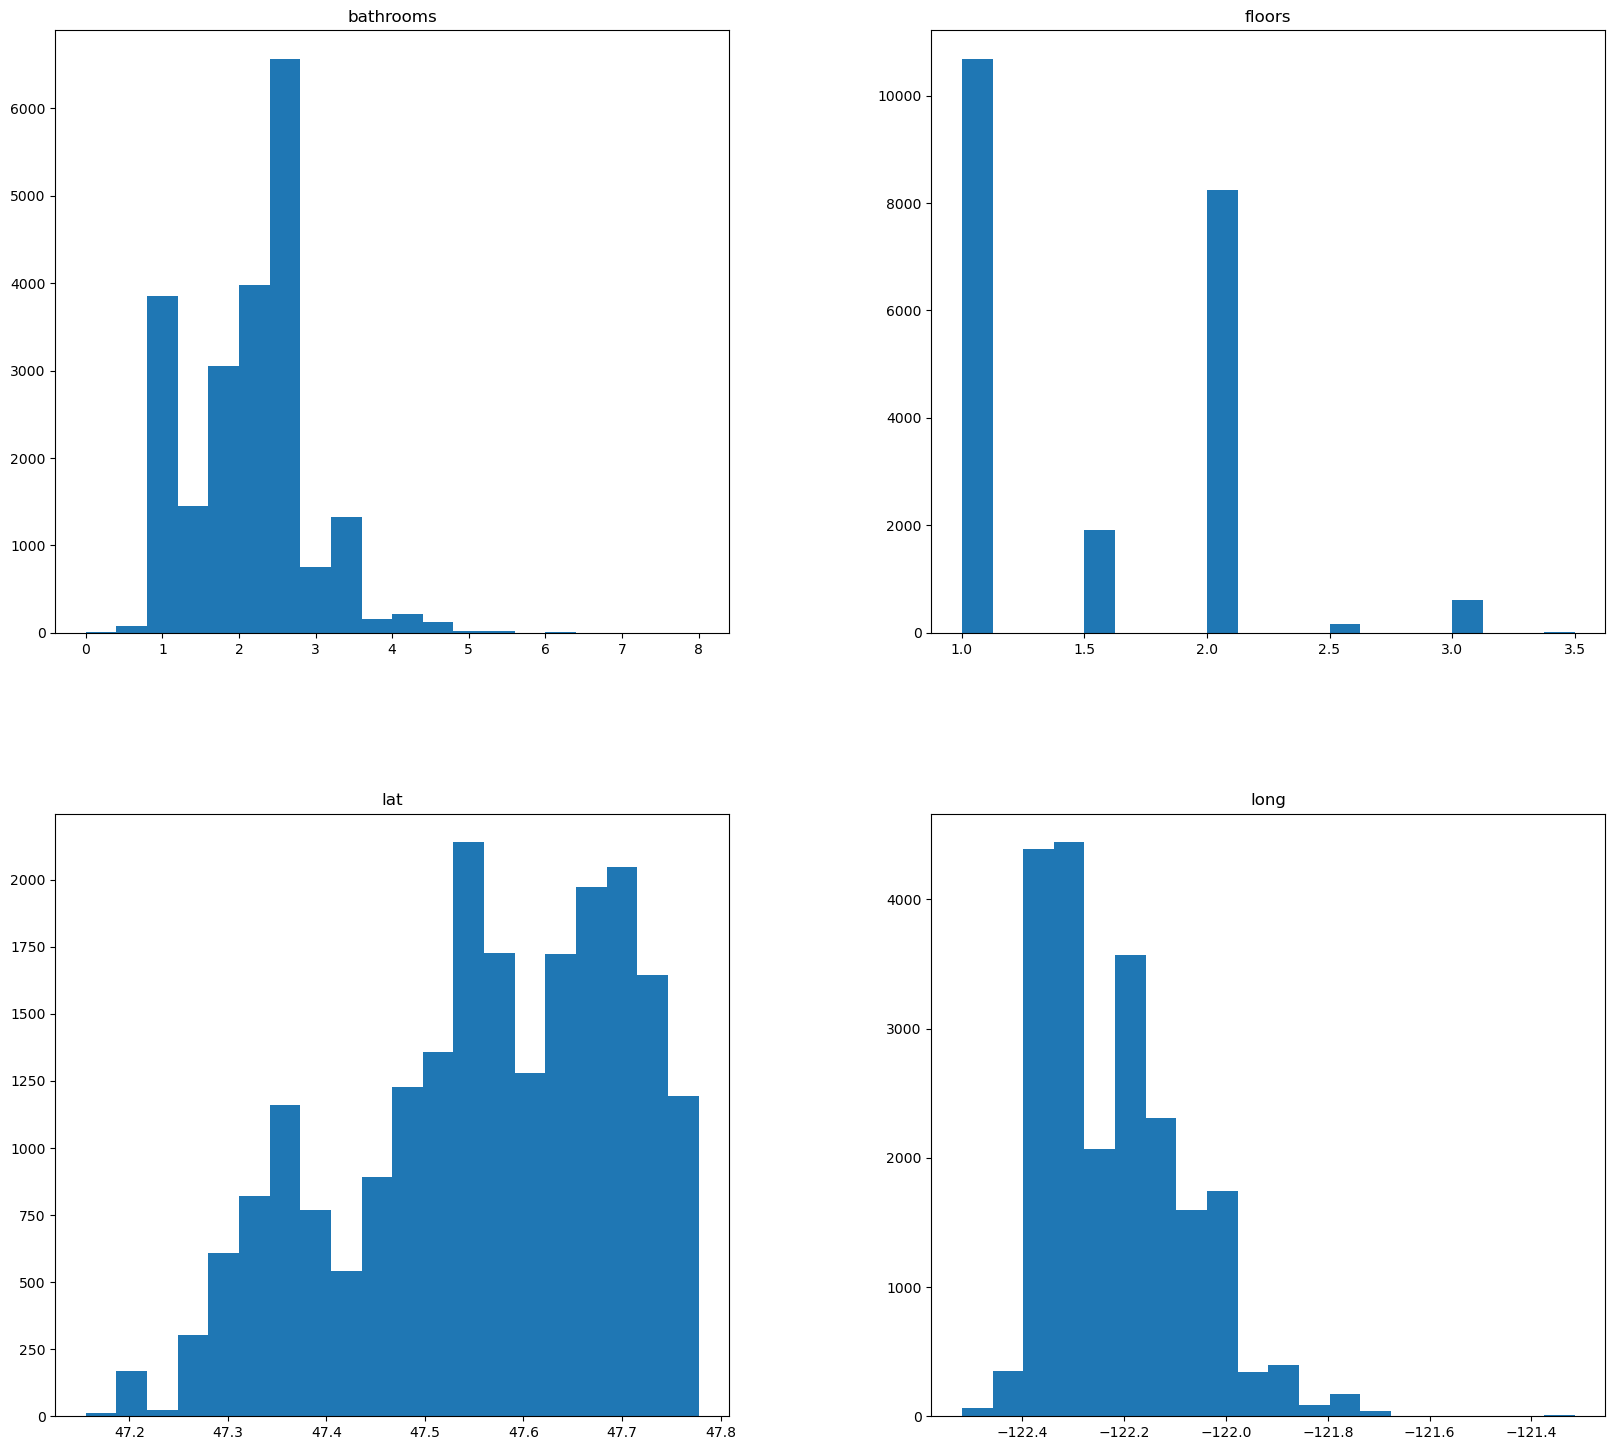

In [27]:
df_real = df.select_dtypes(include = ['float64','float32','float16'])
df_real.drop('price', axis = 1, inplace = True)
df_real.hist(figsize = (20,18), bins = 20, grid = False);

Получили диаграммы всех вещественных признаков, такие как долгота и шрота и видим густонаселенные районы. Больше всего домов с количеством ванных 2 и 1, 2  этажных домов.


#### Рассмотрим выбросы

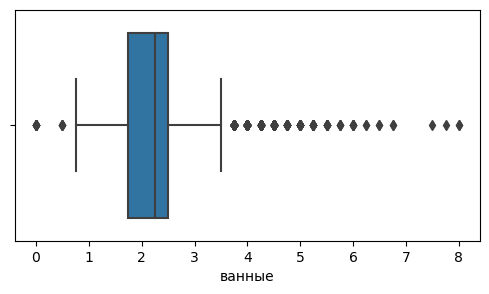

In [28]:
plt.figure(figsize = (6,3))
sns.boxplot(x = df['bathrooms'], whis = 1.5)
plt.xlabel('ванные')
plt.show()

Выбросы от 0-0,75 и  3,5 - 8 лучше выбросить из анализа.

#### Анализ бинарног признака. Проанализируем сколько домов имеют вид на набережную.


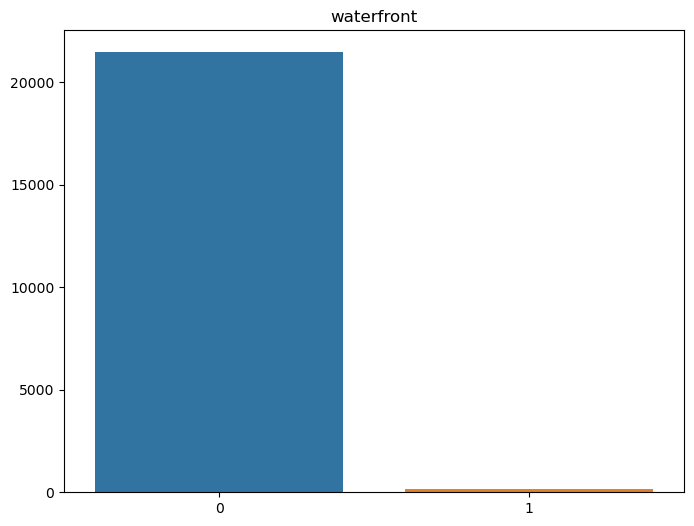

In [35]:
counts = df['waterfront'].value_counts()
plt.figure(figsize = (8,6))
plt.title('Вид на набережную')
sns.barplot(x= counts.index, y = counts.values)
plt.show()

Очень мало домов имеют вид на набережную.

#### Рассмотрим зависимость стоимости домов от количества ванных комнат

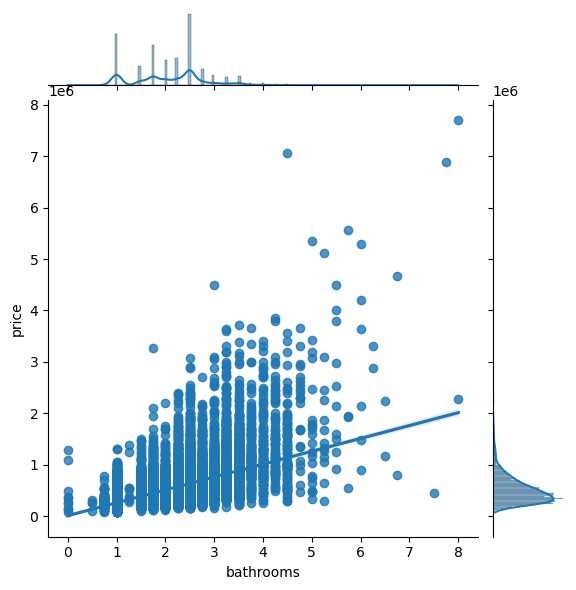

In [36]:
sns.jointplot(x = df['bathrooms'], y = df['price'], kind = 'reg');

Да здесь есть тенденция, что на стоимость дома влияет количество ванных комнат. Не сильная, но есть.

Рассмотрим данные по широте и долготе.

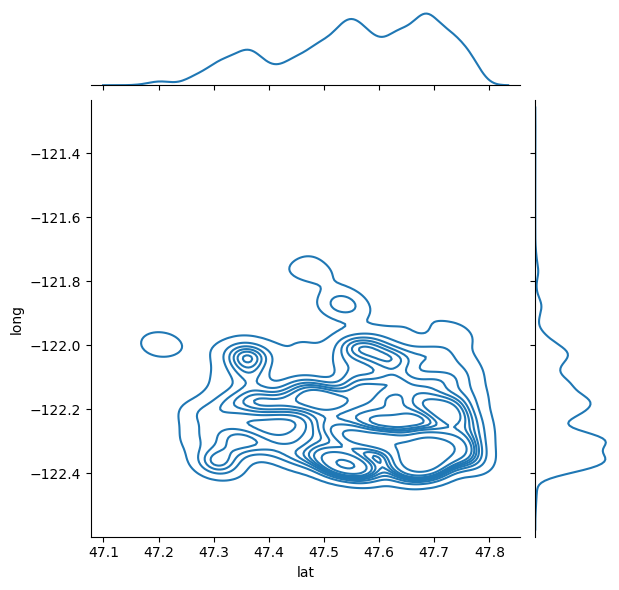

In [37]:
sns.jointplot(x = df['lat'], y = df['long'], kind = 'kde');

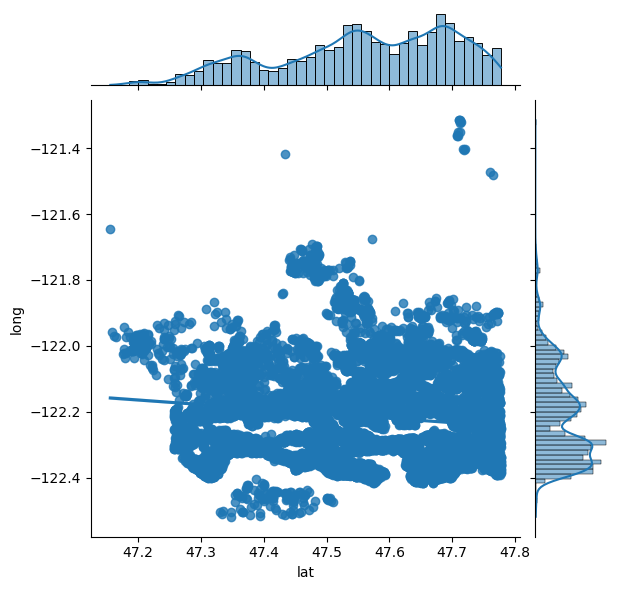

In [39]:
sns.jointplot(x = df['lat'], y = df['long'], kind = 'reg');

Приблизительно равномерно распределены дома в данной местности 

#### Матрица корреляций

Построим матрицу корреляции и на ее основании тепловую карту для лучшей наглядности между какими значениями есть прямая и обратная зависимость

In [16]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,...,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,...,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,...,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,...,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,...,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,...,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0


По данной матрице корреляций видно какие есть прямые зависимости (те значения которые максимально приближенны к единице) и обратные зависимости (в нашем случае максимально приближена к идеальной это индекс от долготы)

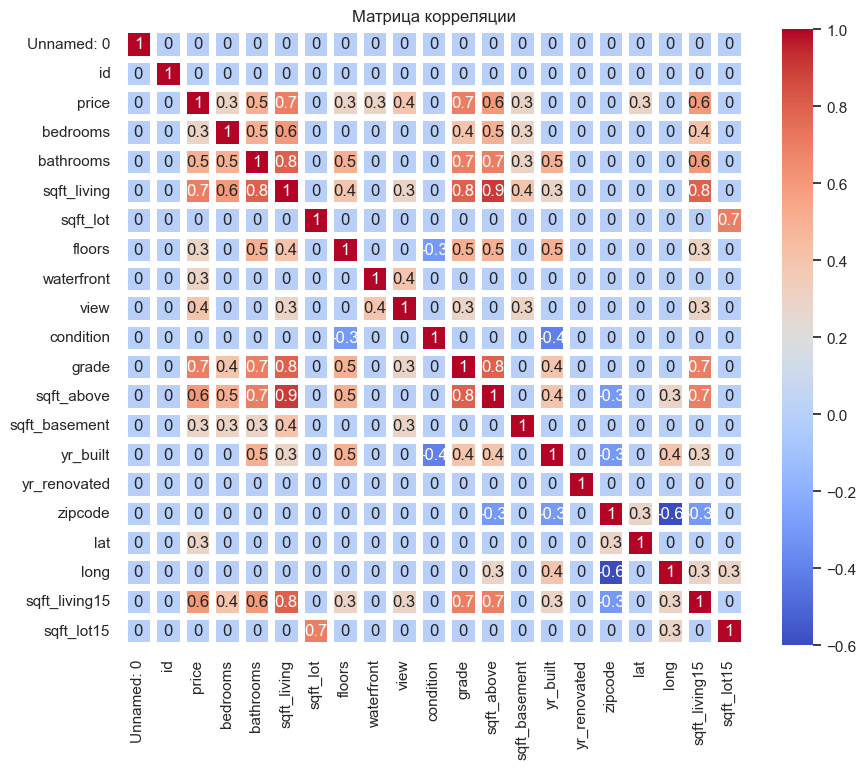

In [24]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1)
sns.heatmap(corr_matrix, annot = True, linewidths = 5, cmap = 'coolwarm')
plt.title('Матрица корреляции');

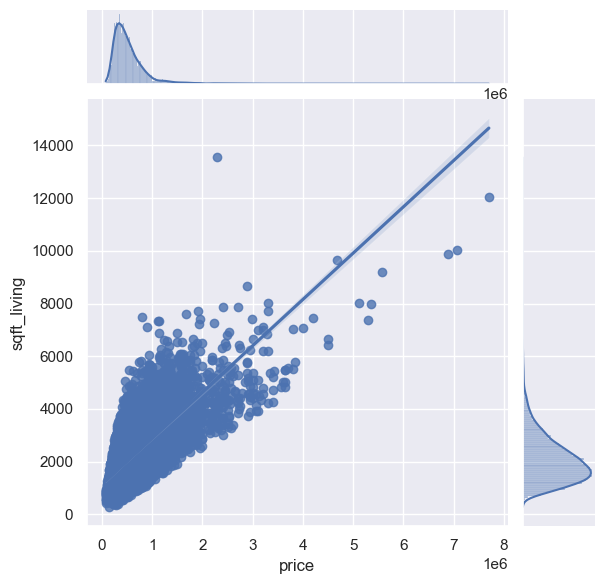

In [25]:
sns.jointplot(x = df['price'], y = df['sqft_living'], kind = 'reg');

Имеется линейная связь стоимости доммов от жилой площади.

И построим обратную зависимость индекса от долготы. Это самые подходящие признаки под данный анализ.

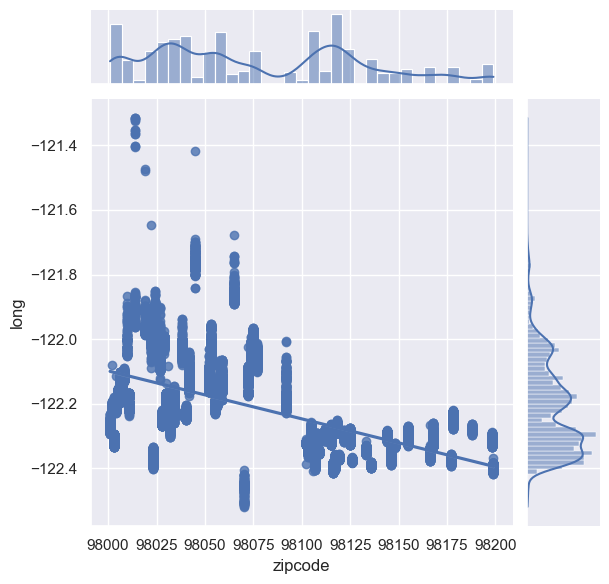

In [26]:
sns.jointplot(x = df['zipcode'], y = df['long'], kind = 'reg');

#### Вывод:

В данных большая часть домов средней стоимости имеют один этаж, две ванные комнаты. Очень мало домов имеют вид на набережную.
Все дома расположены в одном населенном пункте.
Прямая зависимость имееться у цены от жилой площади дома, качества конструкции здания и что дома раполагаются в близи друг друга по уровню достатка владельца. 
Также наблюдается небольшая обратная зависимость индекса от долготы и состояние дома от его возраста.